In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mushroom_cleaned.csv')
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


## Columns:
<li><strong>cap-diameter</strong> - диаметр шляпки</li>
<li><strong>cap-shape</strong> - форма шляпки</li>
<li><strong>gill-attachment</strong> - крепление пластинки в шапке гриба</li>
<li><strong>gill-color</strong> - цвет пластинки в шапке гриба</li>
<li><strong>stem-height</strong> - высота ножки</li>
<li><strong>stem-width</strong> - ширина ножки</li>
<li><strong>stem-color</strong> - цвет ножки</li>
<li><strong>season</strong> - сезон, когда растет гриб</li>
<li><strong>class</strong> - съедобный или нет</li>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [5]:
data.shape

(54035, 9)

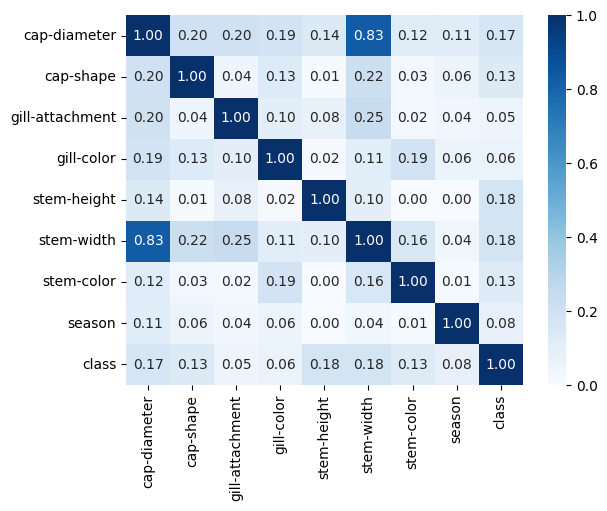

In [7]:
data_corr = data.corr()
sns.heatmap(abs(data_corr), cmap='Blues', vmin=0, vmax=1, annot=True, fmt=".2f")
plt.show()

### Ширина ножки коррелирует с диаметром шляпки. И они имеют почти одинаковое значение корреляции для class. Следовательно, их необходимо либо объединить, либо выбросить один из признаков.

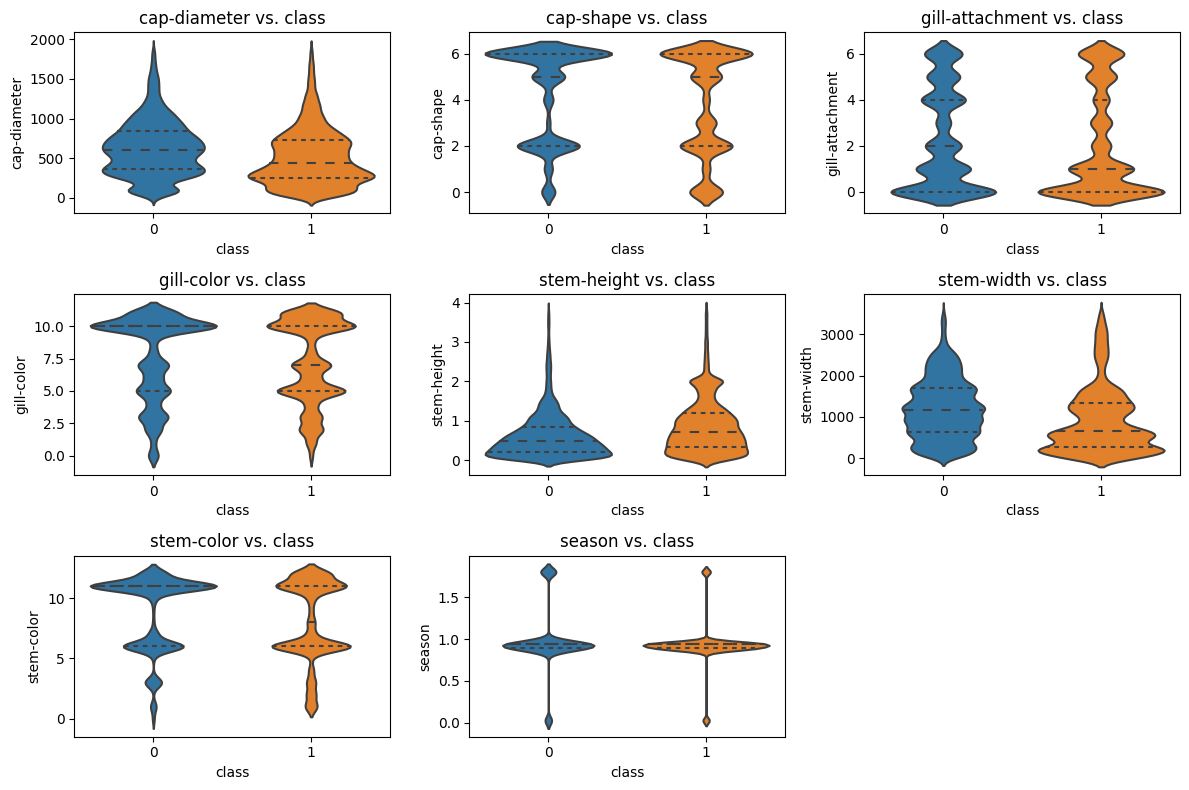

In [12]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='class', y=col, data=data, split=True, inner='quartiles')
    plt.title(f'{col} vs. class')
    plt.xlabel('class')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Заметно, что каки-то сильных различий для съедобный и несъедобных классов не наблюдается, однако можно заметить, что длина ножки у несъедобных грибов в основном чуть ниже, чем у съедобных. Ширина ножки у несъедобных в основном чуть шире.

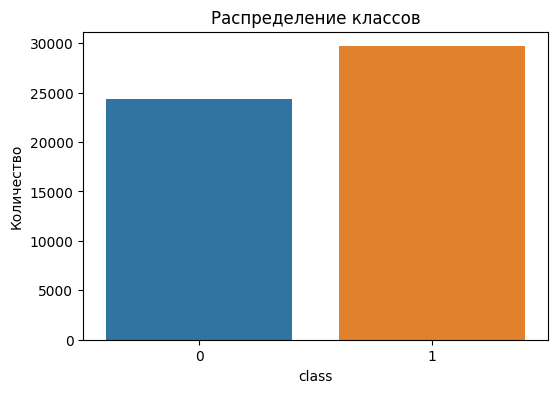

In [13]:
class_counts = data['class'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('class')
plt.ylabel('Количество')
plt.title('Распределение классов')
plt.show()

## Данные относительно сбалансированы.

In [14]:
data['stem_width_cap_diam'] = np.sqrt(data['stem-width'] * data['cap-diameter'])

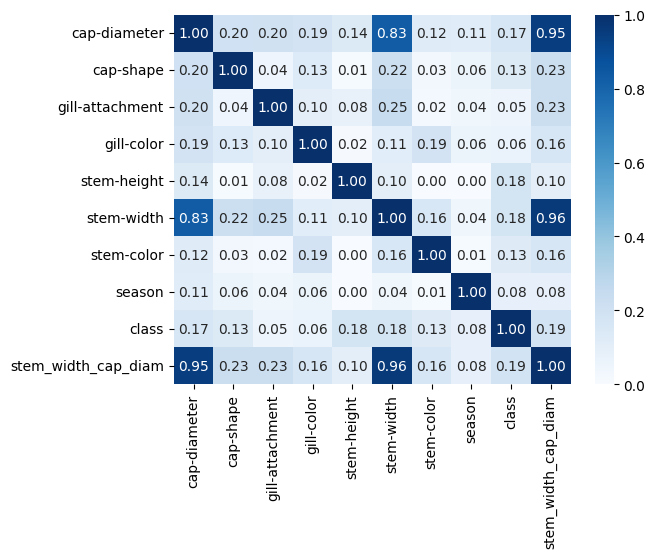

In [15]:
data_corr = data.corr()
sns.heatmap(abs(data_corr), cmap='Blues', vmin=0, vmax=1, annot=True, fmt=".2f")
plt.show()

### Таким образом, выбранные признаки: cap_shape, stem-height, stem-width, stem-color, stem_width_cap_diam

In [18]:
data_features = data[['cap-shape', 'stem-height', 'stem-width', 'stem-color', 'stem_width_cap_diam']]
data_class = data['class']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, data_class, test_size=0.33, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36203, 5)
(17832, 5)
(36203,)
(17832,)
